In [11]:
import pandas as pd
%matplotlib inline

In [4]:
metrics_frame = pd.read_excel('Readiness Score.xlsx', sheet_name='Data')
metrics_frame.head()

,UPC,Full Name,Contact Number,Military Email,Civilian Email,UIC UNIT,UIC CDR,ACTUAL UNIT,ACTUAL CDR,CITY/SECTION,...,Eval Due.1,APFT Due.1,DD93 Due.1,SGLV Due.1,PRR Due.1,Medical Score,Eval Score,Soldier Skill Score,Admin Score,Total Readiness Score
0,87VAA,1LT PEDRO BERMUDEZCUBERO,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.12,0.33,15.3
1,87VAA,BG ROBERT GUIDRY,3123915581,robert.e.guidry.mil@mail.mil,guidryr@sc2corp.com,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,1.0,0.0,0.0,0.0,0.0,0.5,0.30,0.00,0.00,54.0
2,87VAA,COL DOYLE TUISL,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.33,3.3
3,87VAA,CPT BERTHA SANDERSON,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,1.0,1.0,0.0,1.0,1.0,0.00,0.12,0.66,66.6
4,87VAA,CPT REBECCA MORRISON,2176915293,rebecca.m.morrison3.mil@mail.mil,bmoe82415@gmail.com,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.5,0.0,0.0,0.0,0.0,0.0,0.15,0.00,0.00,15.0


In [8]:
count_unit = metrics_frame.groupby(['ACTUAL UNIT']).count().reset_index()
count_unit

,ACTUAL UNIT,UPC,Full Name,Contact Number,Military Email,Civilian Email,UIC UNIT,UIC CDR,ACTUAL CDR,CITY/SECTION,...,Eval Due.1,APFT Due.1,DD93 Due.1,SGLV Due.1,PRR Due.1,Medical Score,Eval Score,Soldier Skill Score,Admin Score,Total Readiness Score
0,AUSTIN,48,48,44,44,41,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,BOSTON,56,56,53,53,52,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
2,CINO(IAAG),41,41,37,37,37,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
3,CMD GRP,9,9,3,3,3,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,HHD,129,129,100,100,82,129,129,129,129,...,129,129,129,129,129,129,129,129,129,129
5,MNT VIEW,16,16,15,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6,SUPPORT,45,45,37,38,37,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
7,Unknown,10,10,0,0,0,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


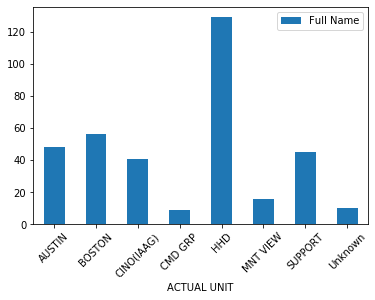

In [23]:
#ax = count_unit.plot.bar(x='ACTUAL UNIT',y='Full Name', rot=0)
#ax.tick_params(axis='x', labelrotation=45)



In [25]:
from scipy import stats
import numpy as np

In [87]:
def create_subsets(groupa, groupb):
    print('comparing %s and %s:' % (groupa, groupb))
    unit_loc_a = groupa
    unit_a_df = metrics_frame.loc[metrics_frame['CITY/SECTION'] == unit_loc_a]
    print('Group %s with average score %s and size %s' % (groupa, 
                                                          unit_a_df['Total Readiness Score'].mean(),
                                                          len(unit_a_df)))
    unit_loc_b = groupb
    unit_b_df = metrics_frame.loc[metrics_frame['CITY/SECTION'] == unit_loc_b]
    print('Group %s with average score %s and size %s' % (groupb, 
                                                          unit_b_df['Total Readiness Score'].mean(),
                                                          len(unit_b_df)))
    return unit_a_df, unit_b_df

In [88]:

def run_t_test(unit_a, unit_b):
    t2, p2 = stats.ttest_ind(unit_a['Total Readiness Score'], unit_b['Total Readiness Score'])
    print('T value: {}'.format(t2))
    print('P value: {}'.format(p2))
    return t2,p2

In [89]:
import itertools as it

In [90]:
t_list = []
p_list = []
group_list = []
group1_vals = []
group2_vals = []
group1_mean = []
group2_mean = []
group1_size = []
group2_size = []
group1_std = []
group2_std = []
combinations = list(it.combinations(metrics_frame['CITY/SECTION'].unique(),2))
for group1, group2 in combinations: 
    group1_df, group2_df = create_subsets(group1, group2)
    t, p = run_t_test(group1_df, group2_df)
    t_list.append(t)
    p_list.append(p)
    group_list.append((group1,group2)),
    group1_vals.append(group1),
    group2_vals.append(group2),
    group1_mean.append(group1_df['Total Readiness Score'].mean()),
    group2_mean.append(group2_df['Total Readiness Score'].mean()),
    group1_size.append(len(group1_df)),
    group2_size.append(len(group2_df)),
    group1_std.append(group1_df['Total Readiness Score'].std()),
    group2_std.append(group2_df['Total Readiness Score'].std())

comparing CMD GRP and CEMA:
Group CMD GRP with average score 23.58 and size 10
Group CEMA with average score 29.82857142857143 and size 7
T value: -0.5204600128271742
P value: 0.6103398736158179
comparing CMD GRP and SJA:
Group CMD GRP with average score 23.58 and size 10
Group SJA with average score 26.233333333333334 and size 9
T value: -0.26499157256825406
P value: 0.7942022760549815
comparing CMD GRP and RETENTION:
Group CMD GRP with average score 23.58 and size 10
Group RETENTION with average score 15.299999999999999 and size 1
T value: nan
P value: nan
comparing CMD GRP and SURG:
Group CMD GRP with average score 23.58 and size 10
Group SURG with average score 7.5 and size 2
T value: 0.8308705580310916
P value: 0.42543987481928713
comparing CMD GRP and TM:
Group CMD GRP with average score 23.58 and size 10
Group TM with average score 33.190909090909095 and size 11
T value: -0.8957724862754587
P value: 0.38158321933605255
comparing CMD GRP and HHD:
Group CMD GRP with average score 

C:\Users\sarah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\sarah\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



T value: -0.9870982492620635
P value: 0.3307770854414124
comparing CMD GRP and AUSTIN:
Group CMD GRP with average score 23.58 and size 10
Group AUSTIN with average score 49.8391304347826 and size 23
T value: -3.1231798312835615
P value: 0.003860675246127926
comparing CMD GRP and DALLAS:
Group CMD GRP with average score 23.58 and size 10
Group DALLAS with average score 59.699999999999996 and size 3
T value: -2.0077678608938796
P value: 0.06986748147729627
comparing CMD GRP and HUNTSVILLE:
Group CMD GRP with average score 23.58 and size 10
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -1.8865273172272112
P value: 0.0885670575187412
comparing CMD GRP and DETROIT:
Group CMD GRP with average score 23.58 and size 10
Group DETROIT with average score 24.3 and size 3
T value: -0.04250874263701151
P value: 0.9668549410109052
comparing CEMA and SJA:
Group CEMA with average score 29.82857142857143 and size 7
Group SJA with average score 26.233333333333334 and size 9
T

Group CEMA with average score 29.82857142857143 and size 7
Group ATLANTA with average score 27.700000000000003 and size 6
T value: 0.13860780785032156
P value: 0.8922650137322052
comparing CEMA and ORLANDO:
Group CEMA with average score 29.82857142857143 and size 7
Group ORLANDO with average score 30.3 and size 10
T value: -0.03994721563043806
P value: 0.9686620575632823
comparing CEMA and Need Update:
Group CEMA with average score 29.82857142857143 and size 7
Group Need Update with average score 32.67599999999999 and size 25
T value: -0.28257946512952997
P value: 0.7794397806615612
comparing CEMA and AUSTIN:
Group CEMA with average score 29.82857142857143 and size 7
Group AUSTIN with average score 49.8391304347826 and size 23
T value: -2.2470613516189823
P value: 0.032702796492037944
comparing CEMA and DALLAS:
Group CEMA with average score 29.82857142857143 and size 7
Group DALLAS with average score 59.699999999999996 and size 3
T value: -1.7565398129411167
P value: 0.1170619054689364

T value: -0.7451871566247525
P value: 0.46159713976844563
comparing SJA and AUSTIN:
Group SJA with average score 26.233333333333334 and size 9
Group AUSTIN with average score 49.8391304347826 and size 23
T value: -3.123050694121146
P value: 0.003945534596185979
comparing SJA and DALLAS:
Group SJA with average score 26.233333333333334 and size 9
Group DALLAS with average score 59.699999999999996 and size 3
T value: -2.5009069769529204
P value: 0.03139801610979802
comparing SJA and HUNTSVILLE:
Group SJA with average score 26.233333333333334 and size 9
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -2.7919142532667602
P value: 0.02098808667598235
comparing SJA and DETROIT:
Group SJA with average score 26.233333333333334 and size 9
Group DETROIT with average score 24.3 and size 3
T value: 0.16481476635878764
P value: 0.8723737673356451
comparing RETENTION and SURG:
Group RETENTION with average score 15.299999999999999 and size 1
Group SURG with average score 7.5

Group HHD with average score 36.06 and size 5
T value: -3.092095778041952
P value: 0.02709493608620747
comparing SURG and G1:
Group SURG with average score 7.5 and size 2
Group G1 with average score 28.892307692307693 and size 13
T value: -1.6401024131689037
P value: 0.12494447900888216
comparing SURG and G2:
Group SURG with average score 7.5 and size 2
Group G2 with average score 56.0 and size 3
T value: -2.909272772698878
P value: 0.062033227917782874
comparing SURG and G3/5/7:
Group SURG with average score 7.5 and size 2
Group G3/5/7 with average score 30.09310344827586 and size 29
T value: -1.1694660148840663
P value: 0.2517384700032989
comparing SURG and G4:
Group SURG with average score 7.5 and size 2
Group G4 with average score 21.73636363636364 and size 11
T value: -0.8259031263015079
P value: 0.42640933773720247
comparing SURG and CHAP:
Group SURG with average score 7.5 and size 2
Group CHAP with average score 38.34545454545455 and size 11
T value: -1.688743319380151
P value: 

T value: 0.3748092037634373
P value: 0.7164819218070358
comparing HHD and Unknown:
Group HHD with average score 36.06 and size 5
Group Unknown with average score 44.385 and size 10
T value: -0.7780429570017838
P value: 0.4504727409538404
comparing HHD and SUPPORT:
Group HHD with average score 36.06 and size 5
Group SUPPORT with average score 38.2125 and size 8
T value: -0.19060483987149815
P value: 0.8523073855204163
comparing HHD and CCDC:
Group HHD with average score 36.06 and size 5
Group CCDC with average score 21.05 and size 12
T value: 2.9204659782123517
P value: 0.010547508557415907
comparing HHD and ASAALT:
Group HHD with average score 36.06 and size 5
Group ASAALT with average score 33.227999999999994 and size 25
T value: 0.4060223584245619
P value: 0.6878125229196952
comparing HHD and DIU:
Group HHD with average score 36.06 and size 5
Group DIU with average score 39.0 and size 1
T value: nan
P value: nan
comparing HHD and FTAC:
Group HHD with average score 36.06 and size 5
Gr

Group DALLAS with average score 59.699999999999996 and size 3
T value: -2.361735220967982
P value: 0.03321175597068628
comparing G1 and HUNTSVILLE:
Group G1 with average score 28.892307692307693 and size 13
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -2.377156335333982
P value: 0.03348537214094288
comparing G1 and DETROIT:
Group G1 with average score 28.892307692307693 and size 13
Group DETROIT with average score 24.3 and size 3
T value: 0.38427642256768385
P value: 0.7065472388318221
comparing G2 and G3/5/7:
Group G2 with average score 56.0 and size 3
Group G3/5/7 with average score 30.09310344827586 and size 29
T value: 1.6135404641541327
P value: 0.11709827347433917
comparing G2 and G4:
Group G2 with average score 56.0 and size 3
Group G4 with average score 21.73636363636364 and size 11
T value: 2.2946644973753223
P value: 0.04058759933736427
comparing G2 and CHAP:
Group G2 with average score 56.0 and size 3
Group CHAP with average score 38.34545454545

T value: -1.3822337610919293
P value: 0.17962973749630398
comparing G4 and NEED UPDATE:
Group G4 with average score 21.73636363636364 and size 11
Group NEED UPDATE with average score 33.6 and size 1
T value: nan
P value: nan
comparing G4 and CINO(IAAG):
Group G4 with average score 21.73636363636364 and size 11
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
T value: nan
P value: nan
comparing G4 and ARTIFICIAL INTELLIGENCE:
Group G4 with average score 21.73636363636364 and size 11
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
T value: nan
P value: nan
comparing G4 and AUTONOMY/ROBOTICS:
Group G4 with average score 21.73636363636364 and size 11
Group AUTONOMY/ROBOTICS with average score 25.65 and size 4
T value: -0.32366736479879255
P value: 0.7513378607121382
comparing G4 and BIG DATA:
Group G4 with average score 21.73636363636364 and size 11
Group BIG DATA with average score 9.15 and size 2
T value: 0.733106052327334
P value: 0.478826

Group CCDC with average score 21.05 and size 12
T value: 1.0210041868013748
P value: 0.320779829293042
comparing G6 and ASAALT:
Group G6 with average score 28.5375 and size 8
Group ASAALT with average score 33.227999999999994 and size 25
T value: -0.6805789278734786
P value: 0.5011899582888149
comparing G6 and DIU:
Group G6 with average score 28.5375 and size 8
Group DIU with average score 39.0 and size 1
T value: nan
P value: nan
comparing G6 and FTAC:
Group G6 with average score 28.5375 and size 8
Group FTAC with average score 34.32 and size 15
T value: -0.5784321392556759
P value: 0.569124553661668
comparing G6 and NEED UPDATE:
Group G6 with average score 28.5375 and size 8
Group NEED UPDATE with average score 33.6 and size 1
T value: nan
P value: nan
comparing G6 and CINO(IAAG):
Group G6 with average score 28.5375 and size 8
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
T value: nan
P value: nan
comparing G6 and ARTIFICIAL INTELLIGENCE:
Group G6 with average sco

T value: -2.2343962879207755
P value: 0.03837796924935331
comparing G8 and SEATTLE:
Group G8 with average score 28.725000000000005 and size 16
Group SEATTLE with average score 28.2 and size 3
T value: 0.049452914411056606
P value: 0.9611347427323267
comparing G8 and DENVER:
Group G8 with average score 28.725000000000005 and size 16
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing G8 and PHOENIX:
Group G8 with average score 28.725000000000005 and size 16
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing G8 and PALO ALTO:
Group G8 with average score 28.725000000000005 and size 16
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -2.215577731860419
P value: 0.03913093146161556
comparing G8 and BOSTON:
Group G8 with average score 28.725000000000005 and size 16
Group BOSTON with average score 42.099999999999994 and size 9
T value: -1.3965506308070814
P value: 0.17588118033982106
comparing G8 and NY

Group Unknown with average score 44.385 and size 10
Group SUPPORT with average score 38.2125 and size 8
T value: 0.5718905990921708
P value: 0.575343481220359
comparing Unknown and CCDC:
Group Unknown with average score 44.385 and size 10
Group CCDC with average score 21.05 and size 12
T value: 3.327220609719527
P value: 0.003359644927480053
comparing Unknown and ASAALT:
Group Unknown with average score 44.385 and size 10
Group ASAALT with average score 33.227999999999994 and size 25
T value: 1.744325507867301
P value: 0.09041142087911758
comparing Unknown and DIU:
Group Unknown with average score 44.385 and size 10
Group DIU with average score 39.0 and size 1
T value: nan
P value: nan
comparing Unknown and FTAC:
Group Unknown with average score 44.385 and size 10
Group FTAC with average score 34.32 and size 15
T value: 1.094555344888222
P value: 0.28504212194349005
comparing Unknown and NEED UPDATE:
Group Unknown with average score 44.385 and size 10
Group NEED UPDATE with average sco

comparing SUPPORT and MNT VIEW:
Group SUPPORT with average score 38.2125 and size 8
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: 0.01190720950486726
P value: 0.9907912322899276
comparing SUPPORT and LOS ANGELES:
Group SUPPORT with average score 38.2125 and size 8
Group LOS ANGELES with average score 53.550000000000004 and size 4
T value: -0.9269737490030603
P value: 0.37577091196682466
comparing SUPPORT and SEATTLE:
Group SUPPORT with average score 38.2125 and size 8
Group SEATTLE with average score 28.2 and size 3
T value: 0.6255610467744692
P value: 0.5471359519277751
comparing SUPPORT and DENVER:
Group SUPPORT with average score 38.2125 and size 8
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing SUPPORT and PHOENIX:
Group SUPPORT with average score 38.2125 and size 8
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing SUPPORT and PALO ALTO:
Group SUPPORT with average score 38.2125 and siz

T value: nan
P value: nan
comparing DIU and PHOENIX:
Group DIU with average score 39.0 and size 1
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing DIU and PALO ALTO:
Group DIU with average score 39.0 and size 1
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: nan
P value: nan
comparing DIU and BOSTON:
Group DIU with average score 39.0 and size 1
Group BOSTON with average score 42.099999999999994 and size 9
T value: nan
P value: nan
comparing DIU and NYC:
Group DIU with average score 39.0 and size 1
Group NYC with average score 25.087500000000002 and size 8
T value: nan
P value: nan
comparing DIU and DC:
Group DIU with average score 39.0 and size 1
Group DC with average score 39.24 and size 15
T value: nan
P value: nan
comparing DIU and ATLANTA:
Group DIU with average score 39.0 and size 1
Group ATLANTA with average score 27.700000000000003 and size 6
T value: nan
P value: nan
comparing DIU and ORLANDO:
Group DIU with average 

Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: nan
P value: nan
comparing ARTIFICIAL INTELLIGENCE and LOS ANGELES:
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
Group LOS ANGELES with average score 53.550000000000004 and size 4
T value: nan
P value: nan
comparing ARTIFICIAL INTELLIGENCE and SEATTLE:
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
Group SEATTLE with average score 28.2 and size 3
T value: nan
P value: nan
comparing ARTIFICIAL INTELLIGENCE and DENVER:
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing ARTIFICIAL INTELLIGENCE and PHOENIX:
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
compari

Group ENERGY/MATERIALS with average score 30.599999999999998 and size 1
Group DETROIT with average score 24.3 and size 3
T value: nan
P value: nan
comparing MEDICAL/SYNTHETIC BIO and OPERATIONS/PROCESSES:
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing MEDICAL/SYNTHETIC BIO and SPACE:
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
Group SPACE with average score 40.74 and size 5
T value: 0.13435182539791865
P value: 0.8975178006308902
comparing MEDICAL/SYNTHETIC BIO and MNT VIEW:
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: 0.1513959572178611
P value: 0.8892710409980485
comparing MEDICAL/SYNTHETIC BIO and LOS ANGELES:
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
Group LOS ANGELES with average score

Group SPACE with average score 40.74 and size 5
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing SPACE and PALO ALTO:
Group SPACE with average score 40.74 and size 5
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -0.6730522693941029
P value: 0.5198791894985935
comparing SPACE and BOSTON:
Group SPACE with average score 40.74 and size 5
Group BOSTON with average score 42.099999999999994 and size 9
T value: -0.0868050762274411
P value: 0.9322581051314603
comparing SPACE and NYC:
Group SPACE with average score 40.74 and size 5
Group NYC with average score 25.087500000000002 and size 8
T value: 2.129354916752237
P value: 0.056642976498580334
comparing SPACE and DC:
Group SPACE with average score 40.74 and size 5
Group DC with average score 39.24 and size 15
T value: 0.12517443854149593
P value: 0.9017728764358933
comparing SPACE and ATLANTA:
Group SPACE with average score 40.74 and size 5
Group ATLANTA with average score 27.7000

Group PALO ALTO with average score 50.940000000000005 and size 5
Group NYC with average score 25.087500000000002 and size 8
T value: 2.2345686000021523
P value: 0.04714768696870201
comparing PALO ALTO and DC:
Group PALO ALTO with average score 50.940000000000005 and size 5
Group DC with average score 39.24 and size 15
T value: 0.8634268600750938
P value: 0.39926201326228283
comparing PALO ALTO and ATLANTA:
Group PALO ALTO with average score 50.940000000000005 and size 5
Group ATLANTA with average score 27.700000000000003 and size 6
T value: 1.1967931450195763
P value: 0.2619603056056107
comparing PALO ALTO and ORLANDO:
Group PALO ALTO with average score 50.940000000000005 and size 5
Group ORLANDO with average score 30.3 and size 10
T value: 1.3957126830727815
P value: 0.18618322308644542
comparing PALO ALTO and Need Update:
Group PALO ALTO with average score 50.940000000000005 and size 5
Group Need Update with average score 32.67599999999999 and size 25
T value: 1.4898471071629733
P va

Group Need Update with average score 32.67599999999999 and size 25
Group DALLAS with average score 59.699999999999996 and size 3
T value: -1.7845103534411357
P value: 0.08601571072677017
comparing Need Update and HUNTSVILLE:
Group Need Update with average score 32.67599999999999 and size 25
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -1.5959214103430617
P value: 0.12307141223364
comparing Need Update and DETROIT:
Group Need Update with average score 32.67599999999999 and size 25
Group DETROIT with average score 24.3 and size 3
T value: 0.5700050224796746
P value: 0.5735672406318794
comparing AUSTIN and DALLAS:
Group AUSTIN with average score 49.8391304347826 and size 23
Group DALLAS with average score 59.699999999999996 and size 3
T value: -0.7426450742055801
P value: 0.46490394926877
comparing AUSTIN and HUNTSVILLE:
Group AUSTIN with average score 49.8391304347826 and size 23
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -0.7

In [91]:
t_test_frame = pd.DataFrame({'group':group_list,'t_value':t_list,'p_value':p_list,
                            'group1':group1_vals,'group1_size':group1_size,'group1_mean':group1_mean,
                            'group1_std':group1_std,'group2':group2_vals,'group2_size':group2_size,
                             'group2_mean':group2_mean, 'group2_std':group2_std,})

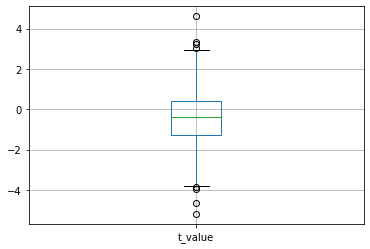

In [92]:
boxlot = t_test_frame.boxplot(column=(['t_value']))

In [94]:
t_test_frame.to_csv(r'C:\Users\sarah\Documents\python\readiness_score_output\t_test_frame_CITY_SECTION.csv')

In [95]:
t_test_frame

,group,t_value,p_value,group1,group1_size,group1_mean,group1_std,group2,group2_size,group2_mean,group2_std
0,"(CMD GRP, CEMA)",-0.520460,0.610340,CMD GRP,10,23.58000,26.097969,CEMA,7,29.828571,21.497575
1,"(CMD GRP, SJA)",-0.264992,0.794202,CMD GRP,10,23.58000,26.097969,SJA,9,26.233333,15.586372
2,"(CMD GRP, RETENTION)",NaN,NaN,CMD GRP,10,23.58000,26.097969,RETENTION,1,15.300000,NaN
3,"(CMD GRP, SURG)",0.830871,0.425440,CMD GRP,10,23.58000,26.097969,SURG,2,7.500000,10.606602
4,"(CMD GRP, TM)",-0.895772,0.381583,CMD GRP,10,23.58000,26.097969,TM,11,33.190909,23.079838
...,...,...,...,...,...,...,...,...,...,...,...
1076,"(AUSTIN, HUNTSVILLE)",-0.720818,0.478285,AUSTIN,23,49.83913,20.386821,HUNTSVILLE,2,60.600000,16.970563
1077,"(AUSTIN, DETROIT)",2.008678,0.055950,AUSTIN,23,49.83913,20.386821,DETROIT,3,24.300000,24.005624
1078,"(DALLAS, HUNTSVILLE)",-0.035050,0.974242,DALLAS,3,59.70000,32.292878,HUNTSVILLE,2,60.600000,16.970563
1079,"(DALLAS, DETROIT)",1.523797,0.202235,DALLAS,3,59.70000,32.292878,DETROIT,3,24.300000,24.005624


In [96]:
metrics_frame['CITY/SECTION'].nunique()

47